In [246]:
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("COLUMNS IN DATAFRAME : ",df.columns)
print("SHAPE OF DATAFRAME : ",df.shape)

df.drop(columns = "customerID",inplace=True)

COLUMNS IN DATAFRAME :  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
SHAPE OF DATAFRAME :  (7043, 21)


In [248]:
df.dtypes
df['TotalCharges'].values

print("NULL VALUE COUNT : \n",df.isna().sum())

print("\n\nDuplicate VALUE COUNT BEFORE : \n",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate VALUE COUNT AFTER : \n",df.duplicated().sum())


Ldf = df[~pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]
Ldf['TotalCharges'] = pd.to_numeric(Ldf['TotalCharges'])
Ldf.reset_index(drop=True, inplace=True)

NULL VALUE COUNT : 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Duplicate VALUE COUNT BEFORE : 
 22
Duplicate VALUE COUNT AFTER : 
 0


C:\Users\Anandhu\AppData\Local\Temp\ipykernel_6948\26905663.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ldf['TotalCharges'] = pd.to_numeric(Ldf['TotalCharges'])


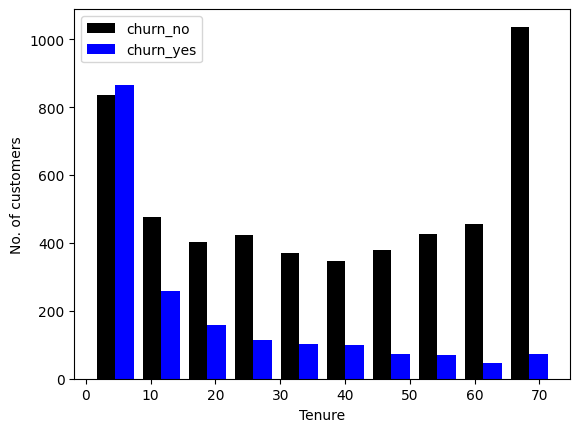

In [249]:
tenure_churn_no = Ldf[Ldf.Churn == "No"].tenure
tenure_churn_yes = Ldf[Ldf.Churn == "Yes"].tenure

plt.hist([tenure_churn_no,tenure_churn_yes],color=['black','blue'],label=['churn_no','churn_yes'])
plt.xlabel("Tenure")
plt.ylabel("No. of customers")
plt.legend()

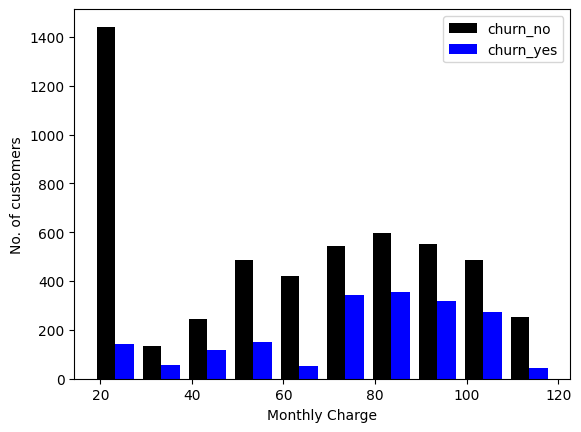

In [250]:
monC_churn_no = Ldf[Ldf.Churn == "No"].MonthlyCharges
monC_churn_yes = Ldf[Ldf.Churn == "Yes"].MonthlyCharges

plt.hist([monC_churn_no,monC_churn_yes],color=['black','blue'],label=['churn_no','churn_yes'])
plt.xlabel("Monthly Charge")
plt.ylabel("No. of customers")
plt.legend()

In [251]:
categirical_column = []
def find_unique_from_df(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            categirical_column.append(i)
            print(i,end="  :  ")
            print(df[i].unique())

find_unique_from_df(Ldf)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [252]:
Ldf = Ldf.replace(["No internet service","No phone service"],"No")
find_unique_from_df(Ldf)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [253]:
categirical_column = list(set(categirical_column))
all_categorical_list = categirical_column.copy()

for i in ['PaymentMethod', 'Contract', 'InternetService', 'gender']:
    if i in categirical_column:
        categirical_column.remove(i)

In [254]:
for i in categirical_column:
    Ldf[i].replace({"Yes":1,"No":0},inplace = True)

Ldf["gender"].replace({"Female":0,"Male":0},inplace = True)

find_unique_from_df(Ldf)

InternetService  :  ['DSL' 'Fiber optic' 'No']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


C:\Users\Anandhu\AppData\Local\Temp\ipykernel_6948\2884686063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ldf[i].replace({"Yes":1,"No":0},inplace = True)
C:\Users\Anandhu\AppData\Local\Temp\ipykernel_6948\2884686063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Ldf[i].replace({"Yes":1,

In [255]:
from sklearn.preprocessing import OneHotEncoder

OneEncoder = OneHotEncoder(drop="first",sparse_output=False)
one_raw_arr = OneEncoder.fit_transform(Ldf[['InternetService','Contract','PaymentMethod']])
one_col_names = OneEncoder.get_feature_names_out()

one_raw_arr

Pdf = pd.DataFrame(one_raw_arr,columns=one_col_names)

Ldf.drop(columns=['InternetService','Contract','PaymentMethod'],inplace=True)
Ndf = pd.concat((Ldf,Pdf),axis=1)

Ndf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7006,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7007,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7008,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [256]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()

Ndf_col = Ndf.columns
Ndf = m_scaler.fit_transform(Ndf)
Ndf = pd.DataFrame(Ndf,columns=Ndf_col)
Ndf


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.115423,0.001275,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,...,0.385075,0.215867,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,...,0.354229,0.010310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,...,0.239303,0.210241,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,...,0.521891,0.015330,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,...,0.662189,0.227521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7006,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.845274,0.847461,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7007,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,...,0.112935,0.037809,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7008,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,...,0.558706,0.033210,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [258]:
from sklearn.model_selection import train_test_split

x = Ndf.drop(columns="Churn")
y = Ndf["Churn"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

x_train.shape

(5257, 23)

In [262]:
import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (23,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_test,y_test,epochs=500)

Epoch 1/500


c:\Users\Anandhu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5242 - loss: 0.6858
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.5317
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.4713
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4409
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.4287
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 0.3981
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8157 - loss: 0.4076
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 0.3932
Epoch 9/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.3944
Epoch 10/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8230 - loss: 0.4039
Epoch 11/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.3952
Epoch 12/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - lo

In [263]:
model.evaluate(x_test,y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.1816


[0.18039289116859436, 0.9218482375144958]

In [274]:
y_predict = model.predict(x_test)

yP = []
for i in y_predict:
    if i>0.5:
        yP.append(1)
    else:
        yP.append(0)

print("PREDICTED VALUE : \n",yP[0:10])
print("ACTUAL VALUE : \n",y_test.values[0:10])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
PREDICTED VALUE : 
 [0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
ACTUAL VALUE : 
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1306
         1.0       0.82      0.88      0.85       447

    accuracy                           0.92      1753
   macro avg       0.89      0.91      0.90      1753
weighted avg       0.92      0.92      0.92      1753



Text(50.722222222222214, 0.5, 'ACTUAL VALUE')

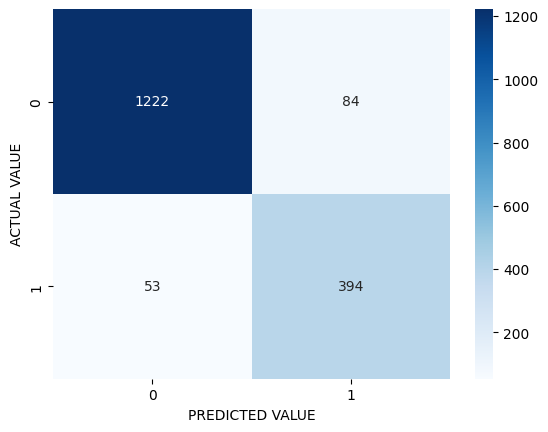

In [282]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn

c_report = classification_report(y_test,yP)
print(c_report)

c_matrix = confusion_matrix(y_test,yP)

sn.heatmap(c_matrix,annot=True,fmt='d',cmap="Blues")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")


Text(50.722222222222214, 0.5, 'ACTUAL VALUE')

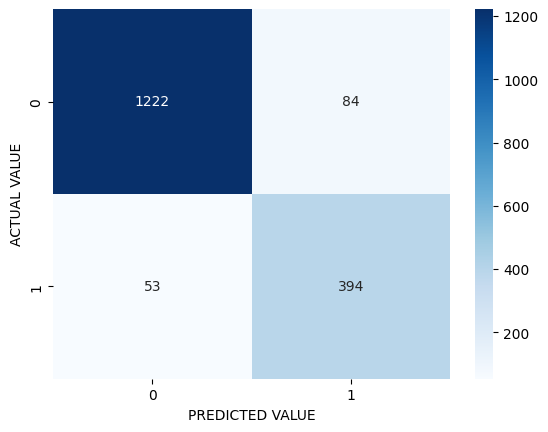

In [283]:
c_tf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

sn.heatmap(c_matrix,annot=True,fmt='d',cmap="Blues")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")